ftp://ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/AURORAL_ELECTROJET/HOURLY/
ftp://ftp.ngdc.noaa.gov/STP/GEOMAGNETIC_DATA/INDICES/AURORAL_ELECTROJET/ONE_MINUTE/ae_1995_minute.txt


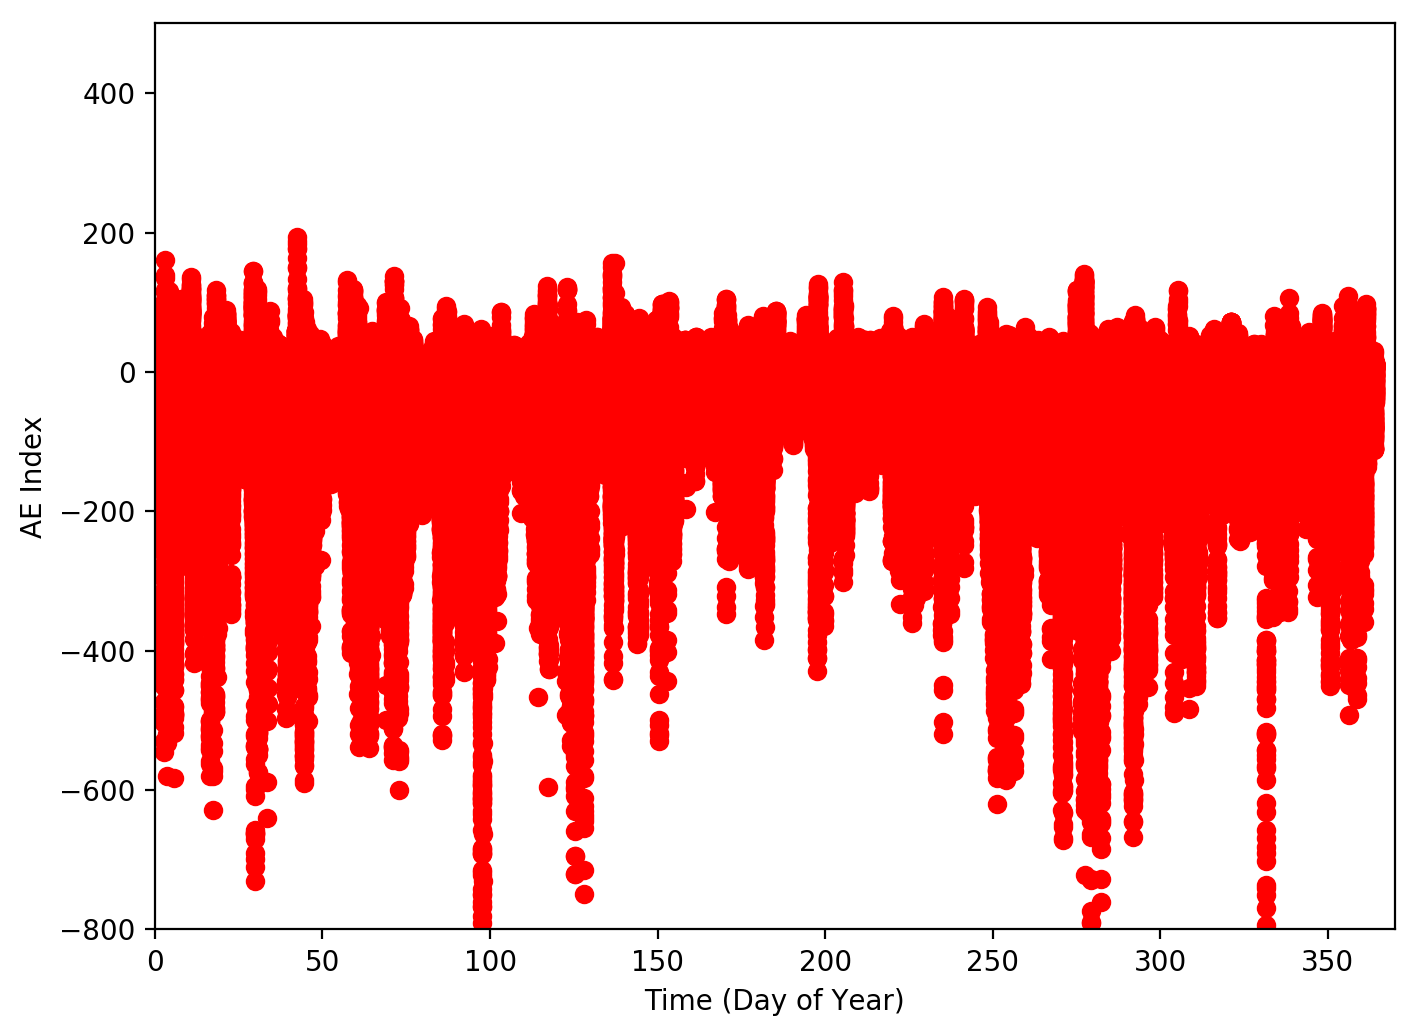

In [56]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from datetime import timedelta, date
import nuclear_test
import auroral_electrojet as ae;

import matplotlib.patches as patches

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)
        
# Get the lists of all NTs 
nts = nuclear_test.nuclear_test_data();
geomag_ae = ae.auroral_electrojet();
print geomag_ae.hourly_folder;

# ae.download_byminute(1980)
# print ae.data_byhour['801111'][12];
# print np.mean(ae.data_byminute['801111-12'])  

# Get a test with timing information 

plt.figure(figsize=(8, 6), dpi=200, )

year = 1995;

# Grab the hourly 
geomag_ae.download_byminute(year);

start_date = date(year, 1, 1)
end_date = date(year, 12, 30)

plot_start_day = 0;
plot_end_day = 370;

for single_date in daterange(start_date, end_date):
    day = single_date.day;
    month = single_date.month;
    doy = single_date.timetuple().tm_yday;
    if((doy>plot_start_day) and (doy<plot_end_day)):
        for hr in np.arange(0,24):
            #if(hr%2==0):
            datecode = str(year-1900)+str(month).zfill(2) + str(day).zfill(2) + '-'+str(hr).zfill(2);
            mins = (np.arange(0,60)+hr*60+24*60*doy)/(60.0*24.0);
            plt.plot(mins, geomag_ae.data_byminute[datecode],'ro');


# Plot on it the tests 
axes = plt.gca()
for kt in nts.tests:
    test = (nts.tests[kt].date_time.year == year) and (nts.tests[kt].yield_kt>100);
    if(test):
        doy = nts.tests[kt].date_time.timetuple().tm_yday;
        
        if((doy>plot_start_day) and (doy<plot_end_day)):
            
            print nts.tests[kt].date_time;
            plt.text(doy-0.4, 400, str(nts.tests[kt].yield_kt) + ' kt', rotation=90);
            plt.text(doy+0.2, 400, 'Lat: ' + str(nts.tests[kt].latitude) + ' Lon: ' + str(nts.tests[kt].longitude) , rotation=90);
        
            x = [doy, doy];
            y = [-1500, 500];
            plt.plot(x,y,'k-');

            axes.add_patch(
                patches.Rectangle(
                    (doy-0.5, -1500), 1, 2000,
                        alpha=0.2)
            );
        
axes.set_xlim([plot_start_day,plot_end_day])
axes.set_ylim([-800,500])
plt.xlabel('Time (Day of Year)')
plt.ylabel('AE Index');
